# Forward Modelling from Tracer Luminosity Function

In this tutorial, we demonstrate how one could compute certain quantities from the tracer luminosity function (LF) using the ``lumfunc_modeller`` module.

## Visualise the luminosity function surface

To get hold of the demo data (a parameter file for the LF model), we use the ``get_test_data_loc`` function from the ``utils`` module.

In [1]:
from horizonground.utils import get_test_data_loc

demo_parameter_file = get_test_data_loc("eBOSS_QSO_LF_PLE_model_fits.txt")

Just to show the contents of the file: there is a comment line with $\mathrm{\LaTeX}$ strings for the parameter names and a comma-demilited line for the parameter values.

In [2]:
with open(demo_parameter_file, 'r') as f:
    print(f.read())

# m_\ast(z_\mathrm{p}), \Delta{m_\ast(z_\mathrm{p})}, \lg\Phi_\ast, \Delta\lg\Phi_\ast, \alpha_\mathrm{l}, \Delta\alpha_\mathrm{l}, \alpha_\mathrm{h}, \Delta\alpha_\mathrm{h}, \beta_\mathrm{l}, \Delta\beta_\mathrm{l}, \beta_\mathrm{h}, \Delta\beta_\mathrm{h}, k_{1\mathrm{l}}, \Delta{k_{1\mathrm{l}}}, k_{1\mathrm{h}}, \Delta{k_{1\mathrm{h}}}, k_{2\mathrm{l}}, \Delta{k_{2\mathrm{l}}}, k_{2\mathrm{h}}, \Delta{k_{2\mathrm{h}}}
-26.71, 0.15, -6.01, 0.07, -4.31, 0.26, -3.04, 0.12, -1.54, 0.04, -1.38, 0.07, -0.08, 0.08, -0.25, 0.09, -0.40, 0.05, -0.05, 0.06



We will adopt the *pure luminosity evolution* (PLE) model for the quasar luminosity function with ``Planck15`` cosmology. First, load the modeller class ``LumFuncModeller`` and ``quasar_PLE_lumfunc``. Note that we need to specify the brightness variable (luminosity $L$ or magnitude $m$) for the luminosity function. The threshold here is given as an apparent magnitude, which we convert to an absolute magnitude at redshift ``normalisation_redshift=2`` by setting ``normalise_thresold=True``. We use the classmethod ``from_parameter_file`` to instantiate this class, which under the hood converts ``demo_parameter_file`` shown above to a dictionary of keyword arguments values passed to the ``model_lumfunc``.

In [3]:
from astropy.cosmology import Planck15
from horizonground.lumfunc_modeller import LumFuncModeller, quasar_PLE_lumfunc

PLE_modeller = LumFuncModeller.from_parameter_file(
    parameter_file=demo_parameter_file,
    model_lumfunc=quasar_PLE_lumfunc,
    brightness_variable='magnitude',
    threshold_value=22.5,
    normalise_threshold=True,
    normalisation_redshift=2.,
    cosmology=Planck15
)

We can see the attrbibutes of this modeller holding the input parameters:

In [4]:
from pprint import pprint

pprint(PLE_modeller.attrs)

{'brightness_variable': 'magnitude',
 'model_parameters': {'\\Delta\\alpha_\\mathrm{h}': 0.12,
                      '\\Delta\\alpha_\\mathrm{l}': 0.26,
                      '\\Delta\\beta_\\mathrm{h}': 0.07,
                      '\\Delta\\beta_\\mathrm{l}': 0.04,
                      '\\Delta\\lg\\Phi_\\ast': 0.07,
                      '\\Delta{k_{1\\mathrm{h}}}': 0.09,
                      '\\Delta{k_{1\\mathrm{l}}}': 0.08,
                      '\\Delta{k_{2\\mathrm{h}}}': 0.06,
                      '\\Delta{k_{2\\mathrm{l}}}': 0.05,
                      '\\Delta{m_\\ast(z_\\mathrm{p})}': 0.15,
                      '\\alpha_\\mathrm{h}': -3.04,
                      '\\alpha_\\mathrm{l}': -4.31,
                      '\\beta_\\mathrm{h}': -1.38,
                      '\\beta_\\mathrm{l}': -1.54,
                      '\\lg\\Phi_\\ast': -6.01,
                      'base10_log': False,
                      'k_{1\\mathrm{h}}': -0.25,
                      'k_{1\\mathrm{l}}': 

We can now visualise the LF as a surface over $(m, z)$ coordinates.

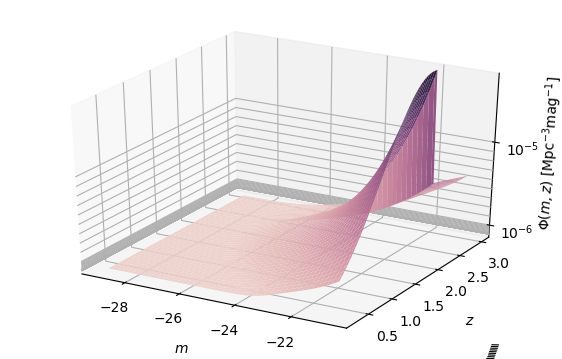

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits import mplot3d

NUM_MESH = 100
MAGNITUDE_RANGE = -29.0, -20.6
REDSHIFT_RANGE = 0.25, 3.
DENSITY_RANGE = pow(10, -9.225), pow(10, -4.775)

magnitudes = np.linspace(*MAGNITUDE_RANGE, num=NUM_MESH, endpoint=False)
redshifts = np.linspace(*REDSHIFT_RANGE, num=NUM_MESH, endpoint=False)

m_grid, z_grid = np.meshgrid(magnitudes, redshifts)
Phi_grid = PLE_modeller.luminosity_function(m_grid, z_grid)

fig = plt.figure("Luminosity function surface", figsize=(7, 4.5), dpi=100)
ax = plt.axes(projection='3d')

ax.plot_surface(m_grid, z_grid, Phi_grid, cmap=sns.cubehelix_palette(as_cmap=True), edgecolor='none')

ax.set_xlabel(r"$m$", labelpad=10)
ax.set_ylabel(r"$z$", labelpad=10)

ax.set_zscale('log')
ax.set_zlim(*DENSITY_RANGE)
ax.set_zticks([pow(10, -5), pow(10, -6)])
ax.set_zlabel(r"$\Phi(m,z)$ [$\mathrm{Mpc}^{-3} \mathrm{mag}^{-1}$]", labelpad=2);

Further, we can derive the comoving number density, evolution bias and magnification bias at, say, redshift $z = 2$.

In [6]:
from IPython.display import display, Math

display(Math(
    r"\text{Comoving number density: }" + 
    r"\bar{{n}} = {:.5f}\ (h/\textrm{{Mpc}})^3".format(PLE_modeller.comoving_number_density(2.))
))
display(Math(
    r"\text{Evolution bias: }" + 
    r"b_\textrm{{e}} = {:.3f}".format(PLE_modeller.evolution_bias(2.))
))
display(Math(
    r"\text{Magnification bias: }" + 
    r"s = {:.3f}".format(PLE_modeller.magnification_bias(2.))
))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Customise your own luminosity function

One could define one's own LF in the form of a Python function ``lum_func(lum, redshift, example_kwarg=None``) and pass it to the modeller class ``LumFuncModeller``. Note that we are not using the classmethod ``from_parameter_file`` as we will pass the keyword arguments manually.

Note that the luminosity function should return a value in the unit of $\textrm{Mpc}^{-3}$. We also recommend that you add a boolean keyword parameter ``base10_log``, so that when it is ``True`` the function returns base-10 logarithmic values.

In [7]:
def custom_lum_func(m, z, base10_log=False, dummy_kwarg='off'):
    if dummy_kwarg == 'off':
        return m * z
    else:
        return m + z
    
custom_modeller = LumFuncModeller(
    custom_lum_func, dict(dummy_kwarg='off'),
    brightness_variable='magnitude', threshold_value=-20, cosmology=Planck15
)

Similarly, we can calculate the evolution and magnification bias.

In [8]:
display(Math(
    r"\text{Evolution bias: }" + 
    r"b_\textrm{{e}} = {:.3f}".format(custom_modeller.evolution_bias(2.))
))
display(Math(
    r"\text{Magnification bias: }" + 
    r"s = {:.3f}".format(custom_modeller.magnification_bias(2.))
))

<IPython.core.display.Math object>

<IPython.core.display.Math object>